# 01-03. 마켓과 머신러닝

## 생선 분류 문제
- 생선을 분류하기 위해서는 분류의 기준이 필요
```python
if fish_length >= 30:
    print("도미")
```
  - 만약 절대 바뀌지 않을 기준이 없다면?   
  → 머신러닝 사용

In [1]:
# 도미의 데이터(동일한 인덱스에 위치한 길이와 무게가 쌍을 이룬다)
# 각각 도미의 길이 특성과 무게 특성
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

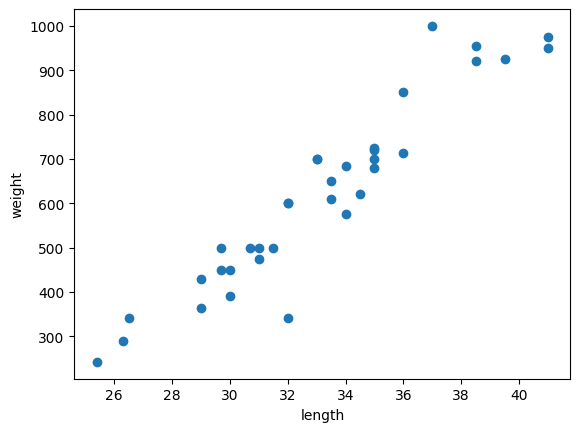

In [2]:
import matplotlib.pyplot as plt  # as를 사용해 함수를 줄여 사용

plt.scatter(bream_length, bream_weight)  # 산점도를 그리는 함수(x축, y축 순서)
plt.xlabel('length')
plt.ylabel('weight')  # 각 축에 이름 붙이기
plt.show()  # 그래프 표시

In [3]:
# 빙어의 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

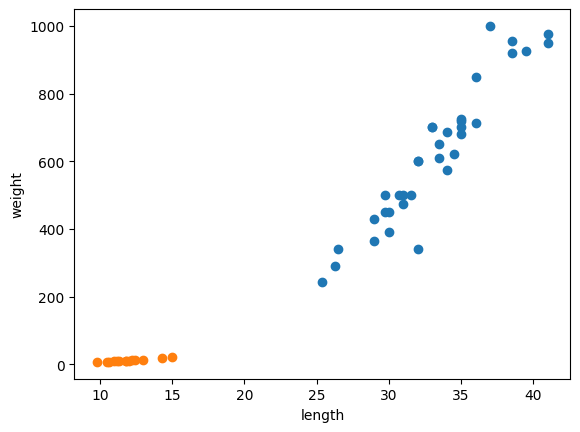

In [4]:
# 동일한 그래프 상에 두 가지 산점도를 나타내기 위해선 scatter함수를 연달아 사용
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 그래프 모두 선형적이다

## k-최근접 이웃(k-nearest Neighbors) 알고리즘
- 가장 가까운 n개의 데이터 중 다수를 차지하는 것을 정답으로 사용
- 알고리즘을 사용하려면 해당 데이터를 모두 가지고 있기만 하면 됨(데이터를 학습한다기보단 저장 후 참고하는 방식)   
→ 간단하지만 데이터가 많을 경우 사용하기 어려움

In [5]:
# 도미와 빙어의 데이터를 하나의 리스트로 정리
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 사이킷런 패키지 사용을 위해 length, weight 쌍을 2차원 리스트로 정리
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [6]:
# 어떤 생선인지에 대한 정답 리스트(1: 도미, 0: 빙어)
# 일반적으로 머신러닝에선 찾는 대상을 1로, 그 외에는 0으로 설정함
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
from sklearn.neighbors import KNeighborsClassifier  # 파이썬에서 k-최근접 이웃 알고리즘을 사용하기 위한 클래스

kn = KNeighborsClassifier()  # 클래스이기 때문에 객체를 먼저 생성해야함
kn.fit(fish_data, fish_target)  # fit함수를 사용해 알고리즘 훈련
kn.score(fish_data, fish_target)  # 정확도 평가

1.0

In [8]:
kn.predict([[30, 600]])  # 학습한 데이터를 바탕으로 예측

array([1])

In [9]:
print(kn._fit_X)  # fish_data 데이터가 저장된 위치
print(kn._y)  # fish_target 데이터가 저장된 위치

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


KNeighborsClassifier 클래스는 주변 5개의 데이터를 기본으로 참고한다.(default: 5)

In [10]:
# 기본값을 49로 설정한 모델 생성
kn49 = KNeighborsClassifier(n_neighbors=49)

# 모든 데이터를 참고하도록 설정했기 때문에 어떤 데이터를 넣든 데이터가 많은 도미로 인식
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [11]:
# 도미 데이터가 35개, 빙어 데이터가 14개이기 때문에 35/49를 해도 동일한 결과값을 얻게 된다.
print(35/49)

0.7142857142857143


In [12]:
# score가 1 미만으로 떨어지기 시작하는 n의 값 찾기
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score < 1:
    print(n, score)
    break

18 0.9795918367346939


## 추가학습
1. Matplotlib.pyplot에 대해 더 자세히 알아보기



- 레이블 여백 지정
```python
plt.xlabel('레이블명', labelpad='숫자')
```

- 레이블 폰트 지정
```python
plt.xlabel('레이블명', fontdict={'family': '원하는 family', 'color': '원하는 컬러 기호', 'weight': '글자상태', 'size': 원하는 글자 크기}
```
  - c에는 rgb, Hex code 등이 포함 가능

- 레이블 위치 지정
```python
plt.xlabel('레이블명', loc='원하는 위치')
```
  - x축: left, center, right
  - y축: bottom, center, top


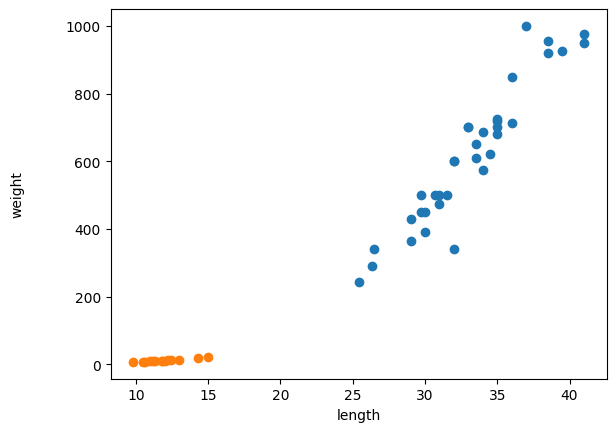

In [15]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight', labelpad=30)
plt.show()

Text(0.5, 0, 'length')

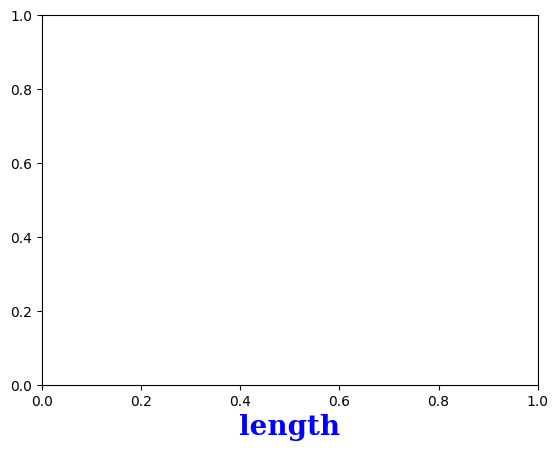

In [19]:
plt.xlabel('length', fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold', 'size': 20})

Text(0, 1, 'weight')

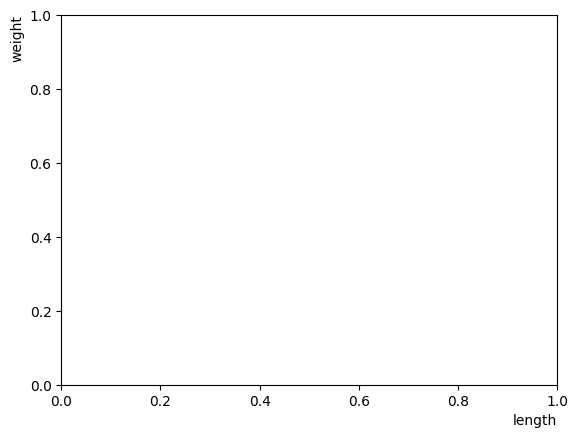

In [21]:
plt.xlabel('length', loc='right')
plt.ylabel('weight', loc='top')

- 산점도 점의 크기와 색 설정
```python
plt.scatter(x, y, s='사이즈'**2, c='색', alpha='투명도(0~1)', cmap='컬러맵')
```
  - 숫자 시퀀스도 c에 들어갈 수 있음



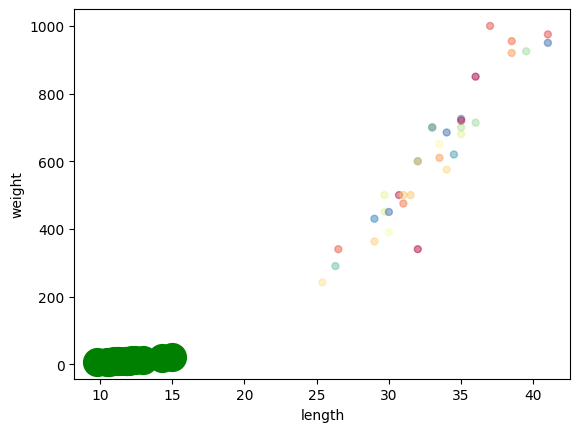

In [26]:
from numpy import random

colors = random.rand(35
                     )
plt.scatter(bream_length, bream_weight, s=5**2, c=colors, alpha=0.5, cmap='Spectral')
plt.scatter(smelt_length, smelt_weight, s=20**2, c='g')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()